# **MLES Project Group 13 : Predicting Future Population Distributions**

---





> Pranav Vatsal     19EE30019 

> Amruit Sahoo      19EE10005

> Subhadeep Paul    19EE3FP03

> Subham            19ME30069

> Gurram Manoj Reddy 19EE10025



# **ABSTRACT**
> This project demonstrates our work on predicting future population distributions upto 2050 by analyzing past population dataset (1960-2021) and using Machine Learning. 

#**INTRODUCTION**
> Population distribution means the pattern of where people live. World population distribution is not uniform. Places which are sparsely populated contain few people. Places which are densely populated contain many people. Sparsely populated places tend to be difficult places to live. 

# **Loading the python libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import xgboost as xgb

import tensorflow as tf
from tensorflow import keras

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

from numpy.ma.core import size
from ctypes import sizeof

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
!pip install shutup
import shutup
shutup.please()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading the data in Colab**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv").set_index("Country Name")

In [ ]:
data.head()

,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
Country Name,,,,,,,,,,,,,,,,,,,,,
India,IND,"Population ages 00-04, female",SP.POP.0004.FE,35572818.0,35930615.0,36528246.0,37319907.0,38144129.0,38905245.0,39825397.0,...,59652862.0,58512576.0,57423770.0,56617737.0,55601232.0,55259151.0,55382130.0,55596970.0,55651093.0,56100000.0
India,IND,"Population ages 00-04, male",SP.POP.0004.MA,37677168.0,37843989.0,38436264.0,39352071.0,40317074.0,41150488.0,42143830.0,...,65665011.0,64420191.0,63252954.0,62365571.0,61298734.0,60913347.0,60997218.0,61184852.0,61228414.0,61705000.0
India,IND,"Population ages 05-09, female",SP.POP.0509.FE,29566250.0,30625739.0,31424388.0,31940934.0,32277654.0,32599959.0,33235222.0,...,60388164.0,60470810.0,60431637.0,60178746.0,59819851.0,59122891.0,58133705.0,57039427.0,56104958.0,55470000.0
India,IND,"Population ages 05-09, male",SP.POP.0509.MA,31987422.0,33251452.0,34131332.0,34617319.0,34877302.0,35168459.0,35774983.0,...,67500938.0,67377416.0,67108452.0,66646489.0,66103641.0,65243099.0,64117537.0,62910580.0,61877169.0,61156000.0
India,IND,"Population ages 10-14, female",SP.POP.1014.FE,23182201.0,24090296.0,25174740.0,26380145.0,27562100.0,28555875.0,29306132.0,...,59134718.0,59380542.0,59589477.0,59760885.0,59979534.0,60140083.0,60231318.0,60172728.0,59853324.0,59247000.0


In [ ]:
data_IND = data.iloc[:28,:]
data_USA = data.iloc[28:56,:]

In [ ]:
data_IND.head()

,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
Country Name,,,,,,,,,,,,,,,,,,,,,
India,IND,"Population ages 00-04, female",SP.POP.0004.FE,35572818.0,35930615.0,36528246.0,37319907.0,38144129.0,38905245.0,39825397.0,...,59652862.0,58512576.0,57423770.0,56617737.0,55601232.0,55259151.0,55382130.0,55596970.0,55651093.0,56100000.0
India,IND,"Population ages 00-04, male",SP.POP.0004.MA,37677168.0,37843989.0,38436264.0,39352071.0,40317074.0,41150488.0,42143830.0,...,65665011.0,64420191.0,63252954.0,62365571.0,61298734.0,60913347.0,60997218.0,61184852.0,61228414.0,61705000.0
India,IND,"Population ages 05-09, female",SP.POP.0509.FE,29566250.0,30625739.0,31424388.0,31940934.0,32277654.0,32599959.0,33235222.0,...,60388164.0,60470810.0,60431637.0,60178746.0,59819851.0,59122891.0,58133705.0,57039427.0,56104958.0,55470000.0
India,IND,"Population ages 05-09, male",SP.POP.0509.MA,31987422.0,33251452.0,34131332.0,34617319.0,34877302.0,35168459.0,35774983.0,...,67500938.0,67377416.0,67108452.0,66646489.0,66103641.0,65243099.0,64117537.0,62910580.0,61877169.0,61156000.0
India,IND,"Population ages 10-14, female",SP.POP.1014.FE,23182201.0,24090296.0,25174740.0,26380145.0,27562100.0,28555875.0,29306132.0,...,59134718.0,59380542.0,59589477.0,59760885.0,59979534.0,60140083.0,60231318.0,60172728.0,59853324.0,59247000.0


# **Data Preprocessing**

In [ ]:
data_IND.drop(columns=['Country Code', 'Series Code'], inplace = True)
data_IND.insert(1, "Gender", ["F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"], True)
age_group = ["00-04", "00-04", "05-09", "05-09", "10-14", "10-14", "15-19", "15-19", "20-24", "20-24", "25-29", "25-29", "30-34", "30-34", "35-39", "35-39", "40-44", "40-44", "45-49", "45-49", "50-54", "50-54", "55-59", "55-59", "60-64", "60-64", "65 and abpve", "65 and above"]
data_IND.insert(2,"Age Group", age_group , True)
data_IND.drop(columns=['Series Name'], inplace = True)

In [ ]:
replace = dict()
for i in range(1960, 2022):
    replace[str(i) + " [YR" + str(i) + "]"] = i
data_IND.rename(columns = replace, inplace = True)

In [ ]:
data_IND.head()

,Gender,Age Group,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
India,F,00-04,35572818.0,35930615.0,36528246.0,37319907.0,38144129.0,38905245.0,39825397.0,40463405.0,...,59652862.0,58512576.0,57423770.0,56617737.0,55601232.0,55259151.0,55382130.0,55596970.0,55651093.0,56100000.0
India,M,00-04,37677168.0,37843989.0,38436264.0,39352071.0,40317074.0,41150488.0,42143830.0,42824436.0,...,65665011.0,64420191.0,63252954.0,62365571.0,61298734.0,60913347.0,60997218.0,61184852.0,61228414.0,61705000.0
India,F,05-09,29566250.0,30625739.0,31424388.0,31940934.0,32277654.0,32599959.0,33235222.0,33935875.0,...,60388164.0,60470810.0,60431637.0,60178746.0,59819851.0,59122891.0,58133705.0,57039427.0,56104958.0,55470000.0
India,M,05-09,31987422.0,33251452.0,34131332.0,34617319.0,34877302.0,35168459.0,35774983.0,36476092.0,...,67500938.0,67377416.0,67108452.0,66646489.0,66103641.0,65243099.0,64117537.0,62910580.0,61877169.0,61156000.0
India,F,10-14,23182201.0,24090296.0,25174740.0,26380145.0,27562100.0,28555875.0,29306132.0,29939164.0,...,59134718.0,59380542.0,59589477.0,59760885.0,59979534.0,60140083.0,60231318.0,60172728.0,59853324.0,59247000.0


# **Data Prediction using XGBoost Linear Regressor**

## Extracting X and y from the data

In [ ]:
def gen_Xy(sz, Data, fyear = 2021):
    input=[]
    output=[]
    for k in range(0,28):
        for i in range(1960,fyear-sz+1):
            temp=[]
            for j in range(i,i+sz):
                temp.append(Data[j][k])
            input.append(temp)
            output.append(Data[i+sz][k])
    input = np.array(input)
    output = np.array(output)
    #input = MinMaxScaler().fit_transform(input)
    print("The shape of input array is " + str(input.shape[0]) + " and size " + str(input.shape[1]) + ". Output array shape is " + str(output.shape[0]) + ". The data is scaled.")
    return input, output

## Using XGBoost Regressor

In [ ]:
def xgb_model_training(input, output):
    model_xgb = xgb.XGBRegressor(verbosity = 0, silent=True)

    input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.1)

    model_xgb.fit(input_train,output_train)
    
    a=mean_absolute_error(output_test, model_xgb.predict(input_test))
    return a

## Training  XGBoost model for various sizes

In [ ]:
error = []
for sz in range(1, 21):
    input, output = gen_Xy(sz, data_IND)
    e = xgb_model_training(input, output)
    print("Size :- " + str(sz) + " , Error :- " + str(e))
    error.append(e)

The shape of input array is 1708 and size 1. Output array shape is 1708. The data is scaled.
Size :- 1 , Error :- 248576.58479532163
The shape of input array is 1680 and size 2. Output array shape is 1680. The data is scaled.
Size :- 2 , Error :- 176621.41666666666
The shape of input array is 1652 and size 3. Output array shape is 1652. The data is scaled.
Size :- 3 , Error :- 228705.6686746988
The shape of input array is 1624 and size 4. Output array shape is 1624. The data is scaled.
Size :- 4 , Error :- 222418.40184049078
The shape of input array is 1596 and size 5. Output array shape is 1596. The data is scaled.
Size :- 5 , Error :- 219292.640625
The shape of input array is 1568 and size 6. Output array shape is 1568. The data is scaled.
Size :- 6 , Error :- 201550.51910828025
The shape of input array is 1540 and size 7. Output array shape is 1540. The data is scaled.
Size :- 7 , Error :- 216917.39935064936
The shape of input array is 1512 and size 8. Output array shape is 1512. Th

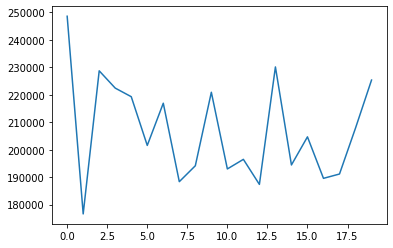

In [ ]:
import matplotlib.pyplot as plt
plt.plot(error) 

# **Predicting Future data for 30 years**

In [ ]:
for i in range(30):
    input, output = gen_Xy(5, data_IND, 2021 + i)
    model_xgb = xgb.XGBRegressor(verbosity = 0, silent=True)
    model_xgb.fit(input,output)
    l = []
    for j in range(28):
        l.append(list(data_IND.iloc[j, -5:]))
    #l = MinMaxScaler().fit_transform(l)
    data_IND[2022+i] = model_xgb.predict(l)
    #print(l)
    print("Predicted data for the year " + str(2022+i))

The shape of input array is 1596 and size 5. Output array shape is 1596. The data is scaled.
Predicted data for the year 2022
The shape of input array is 1624 and size 5. Output array shape is 1624. The data is scaled.
Predicted data for the year 2023
The shape of input array is 1652 and size 5. Output array shape is 1652. The data is scaled.
Predicted data for the year 2024
The shape of input array is 1680 and size 5. Output array shape is 1680. The data is scaled.
Predicted data for the year 2025
The shape of input array is 1708 and size 5. Output array shape is 1708. The data is scaled.
Predicted data for the year 2026
The shape of input array is 1736 and size 5. Output array shape is 1736. The data is scaled.
Predicted data for the year 2027
The shape of input array is 1764 and size 5. Output array shape is 1764. The data is scaled.
Predicted data for the year 2028
The shape of input array is 1792 and size 5. Output array shape is 1792. The data is scaled.
Predicted data for the ye

# **Different Plots**

In [ ]:
age_with_gender = []
for i in range(len(age_group)):
    age_with_gender.append(age_group[i] + (" Female" if i%2 == 0 else " Male"))

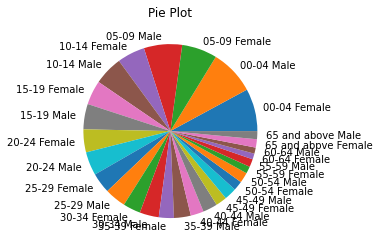

In [ ]:
plt.pie(list(data_IND.loc[:,1960]), labels=age_with_gender)
plt.title("Pie Plot")
plt.show()

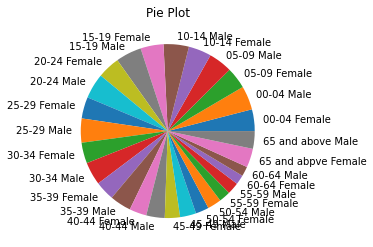

In [ ]:
plt.pie(list(data_IND.loc[:,2021]), labels=age_with_gender)
plt.title("Pie Plot")
plt.show()

In [ ]:
data_IND.head()

,Gender,Age Group,1960,1961,1962,1963,1964,1965,1966,1967,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051
Country Name,,,,,,,,,,,,,,,,,,,,,
India,F,00-04,35572818.0,35930615.0,36528246.0,37319907.0,38144129.0,38905245.0,39825397.0,40463405.0,...,59826244.0,59629104.0,59484040.0,59457804.0,59590528.0,59479960.0,59565744.0,59614792.0,59627552.0,59599124.0
India,M,00-04,37677168.0,37843989.0,38436264.0,39352071.0,40317074.0,41150488.0,42143830.0,42824436.0,...,66054816.0,66046164.0,66058696.0,66052656.0,66047796.0,66037840.0,66048400.0,66052408.0,66047692.0,66043016.0
India,F,05-09,29566250.0,30625739.0,31424388.0,31940934.0,32277654.0,32599959.0,33235222.0,33935875.0,...,58204076.0,58535000.0,58600984.0,58618560.0,59146192.0,59349684.0,59540200.0,59722888.0,59864528.0,59849840.0
India,M,05-09,31987422.0,33251452.0,34131332.0,34617319.0,34877302.0,35168459.0,35774983.0,36476092.0,...,61247128.0,61252224.0,61248168.0,61261280.0,61245888.0,61252384.0,61237728.0,61248968.0,61246608.0,61246108.0
India,F,10-14,23182201.0,24090296.0,25174740.0,26380145.0,27562100.0,28555875.0,29306132.0,29939164.0,...,59826244.0,59629104.0,59484040.0,59457804.0,59590528.0,59479960.0,59565744.0,59614792.0,59627552.0,59599124.0


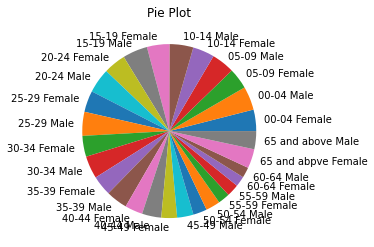

In [ ]:
plt.pie(list(data_IND.loc[:,2024]), labels=age_with_gender)
plt.title("Pie Plot")
plt.show()

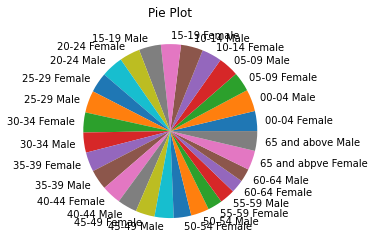

In [ ]:
plt.pie(list(data_IND.loc[:,2040]), labels=age_with_gender)
plt.title("Pie Plot")
plt.show()

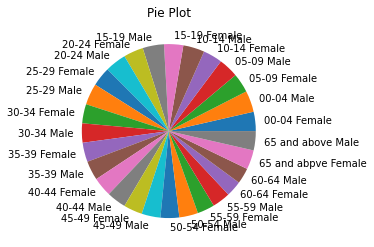

In [ ]:
plt.pie(list(data_IND.loc[:,2050]), labels=age_with_gender)
plt.title("Pie Plot")
plt.show()

In [ ]:
x = []
y = []
for i in range(1960,2052):
    x.append(i)
    y.append(sum(list(data_IND.loc[:, i])))

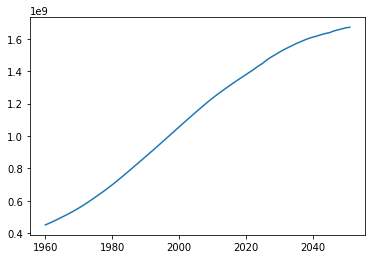

In [ ]:
plt.plot(x, y)

# **Using Deep Neural Network**

In [ ]:
input, output = gen_Xy(5, data_IND)

The shape of input array is 1596 and size 5. Output array shape is 1596. The data is scaled.


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[5])) # flatten layer
model.add(keras.layers.Dense(5, activation="selu",kernel_initializer="he_normal")) # dense layer 1
model.add(keras.layers.Dense(20, activation="selu",kernel_initializer="he_normal")) # dense layer 2
model.add(keras.layers.Dense(20, activation="selu",kernel_initializer="he_normal")) # dense layer 2
model.add(keras.layers.Dense(5, activation="selu",kernel_initializer="he_normal")) # dense layer 2
model.add(keras.layers.Dense(1)) # dense layer 1

In [ ]:
model.compile(loss="mse",
              optimizer='Adam',
              metrics=["mean_absolute_error"])

In [ ]:
model_history=model.fit(input,output,validation_split=0.15,batch_size = 1, epochs = 40)

Epoch 1/40
1356/1356 [==============================] - 4s 2ms/step - loss: 30357629960192.0000 - mean_absolute_error: 1082552.5000 - val_loss: 136982659072.0000 - val_mean_absolute_error: 257559.5781
Epoch 2/40
1356/1356 [==============================] - 3s 2ms/step - loss: 403639271424.0000 - mean_absolute_error: 461999.9375 - val_loss: 140576260096.0000 - val_mean_absolute_error: 264545.4688
Epoch 3/40
1356/1356 [==============================] - 3s 2ms/step - loss: 1173227175936.0000 - mean_absolute_error: 719292.6250 - val_loss: 117417418752.0000 - val_mean_absolute_error: 230577.6875
Epoch 4/40
1356/1356 [==============================] - 3s 2ms/step - loss: 829726588928.0000 - mean_absolute_error: 668465.6875 - val_loss: 147777142784.0000 - val_mean_absolute_error: 275749.7500
Epoch 5/40
1356/1356 [==============================] - 3s 2ms/step - loss: 820958396416.0000 - mean_absolute_error: 639482.6875 - val_loss: 2186549133312.0000 - val_mean_absolute_error: 1259661.5000
Epoc

In [ ]:
model_history=model.fit(input,output,validation_split=0.15, epochs = 50)

Epoch 1/50
43/43 [==============================] - 1s 7ms/step - loss: 125991370752.0000 - mean_absolute_error: 251385.3906 - val_loss: 52643131392.0000 - val_mean_absolute_error: 145460.9531
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 122911457280.0000 - mean_absolute_error: 245592.0312 - val_loss: 60164902912.0000 - val_mean_absolute_error: 163145.8594
Epoch 3/50
43/43 [==============================] - 0s 4ms/step - loss: 121429344256.0000 - mean_absolute_error: 242943.6406 - val_loss: 58268164096.0000 - val_mean_absolute_error: 159413.1406
Epoch 4/50
43/43 [==============================] - 0s 4ms/step - loss: 119722582016.0000 - mean_absolute_error: 240925.5000 - val_loss: 50184568832.0000 - val_mean_absolute_error: 141367.8594
Epoch 5/50
43/43 [==============================] - 0s 4ms/step - loss: 121036898304.0000 - mean_absolute_error: 240903.2969 - val_loss: 65699848192.0000 - val_mean_absolute_error: 172162.3906
Epoch 6/50
43/43 [=================

## USING GRU

In [ ]:
input2=input.reshape(1596,1,5)

In [ ]:

model = keras.Sequential()
# First GRU layer
model.add(layers.GRU(units=5, return_sequences=True, input_shape=(1,sz), activation='tanh'))
model.add(layers.GRU(units=20, return_sequences=True, input_shape=(1,sz), activation='tanh'))
model.add(layers.GRU(units=20, return_sequences=True, input_shape=(1,sz), activation='tanh'))
model.add(layers.GRU(units=5, return_sequences=True, input_shape=(1,sz), activation='tanh'))
# model.add(layers.Dropout(0.2))
# Second GRU layer
# model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,sz), activation='tanh'))
# model.add(layers.Dropout(0.2))
# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
# model.add(layers.Dropout(0.2))
# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_absolute_error'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 5)              405       
                                                                 
 gru_1 (GRU)                 (None, 1, 20)             1620      
                                                                 
 gru_2 (GRU)                 (None, 1, 20)             2520      
                                                                 
 gru_3 (GRU)                 (None, 1, 5)              405       
                                                                 
 gru_4 (GRU)                 (None, 100)               32100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 37,151
Trainable params: 37,151
Non-trai

In [ ]:
history = model.fit(input2,output,epochs=50,batch_size=128, verbose=1)

Epoch 1/50


ValueError: ignored

In [ ]:
data_IND[1960]

Country Name
India    35572818.0
India    37677168.0
India    29566250.0
India    31987422.0
India    23182201.0
India    24284785.0
India    20348261.0
India    21231950.0
India    19208535.0
India    19687762.0
India    17061904.0
India    17784394.0
India    14648328.0
India    16042622.0
India    12594186.0
India    14083447.0
India    10926762.0
India    12231828.0
India     9319232.0
India    10313063.0
India     7886300.0
India     8677214.0
India     5919451.0
India     6621552.0
India     4831834.0
India     5129458.0
India     6976874.0
India     6752074.0
Name: 1960, dtype: float64

# Test

In [ ]:
data_IND

,Gender,Age Group,1960,1961,1962,1963,1964,1965,1966,1967,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051
Country Name,,,,,,,,,,,,,,,,,,,,,
India,F,00-04,35572818.0,35930615.0,36528246.0,37319907.0,38144129.0,38905245.0,39825397.0,40463405.0,...,59826244.0,59629104.0,59484040.0,59457804.0,59590528.0,59479960.0,59565744.0,59614792.0,59627552.0,59599124.0
India,M,00-04,37677168.0,37843989.0,38436264.0,39352071.0,40317074.0,41150488.0,42143830.0,42824436.0,...,66054816.0,66046164.0,66058696.0,66052656.0,66047796.0,66037840.0,66048400.0,66052408.0,66047692.0,66043016.0
India,F,05-09,29566250.0,30625739.0,31424388.0,31940934.0,32277654.0,32599959.0,33235222.0,33935875.0,...,58204076.0,58535000.0,58600984.0,58618560.0,59146192.0,59349684.0,59540200.0,59722888.0,59864528.0,59849840.0
India,M,05-09,31987422.0,33251452.0,34131332.0,34617319.0,34877302.0,35168459.0,35774983.0,36476092.0,...,61247128.0,61252224.0,61248168.0,61261280.0,61245888.0,61252384.0,61237728.0,61248968.0,61246608.0,61246108.0
India,F,10-14,23182201.0,24090296.0,25174740.0,26380145.0,27562100.0,28555875.0,29306132.0,29939164.0,...,59826244.0,59629104.0,59484040.0,59457804.0,59590528.0,59479960.0,59565744.0,59614792.0,59627552.0,59599124.0
India,M,10-14,24284785.0,25434495.0,26824748.0,28372842.0,29872964.0,31102176.0,31989295.0,32673931.0,...,66027324.0,66038932.0,66040972.0,66052656.0,66033856.0,66037840.0,66048400.0,66052408.0,66047692.0,66043016.0
India,F,15-19,20348261.0,20570063.0,20851288.0,21236295.0,21795224.0,22561697.0,23426757.0,24527208.0,...,59590448.0,59414000.0,59591464.0,59457804.0,59590528.0,59605448.0,59613332.0,59580812.0,59627552.0,59599124.0
India,M,15-19,21231950.0,21504510.0,21782818.0,22156884.0,22765444.0,23677932.0,24784197.0,26208568.0,...,66027324.0,66038932.0,66040972.0,66052656.0,66033856.0,66037840.0,66048400.0,66052408.0,66047692.0,66043016.0
India,F,20-24,19208535.0,19323206.0,19380200.0,19424887.0,19527615.0,19731519.0,19925180.0,20208420.0,...,61247128.0,61252224.0,61248168.0,61261280.0,61245888.0,61252384.0,61237728.0,61248968.0,61246608.0,61246108.0


In [ ]:
age_with_gender

In [ ]:
sum(data_IND.iloc[[0,2,4,6,8], :][1960])

127878065.0

In [ ]:
x

In [ ]:
plt.figure(figsize=(20, 20))
plt.xlabel('Years')
plt.ylabel('Population')

for i in range(len(age_with_gender)):
    y = []
    for j in range(len(x)):
        y.append(data_IND.iloc[i, :][x[j]])
    plt.plot(x, y)

plt.legend(age_with_gender)
plt.show()

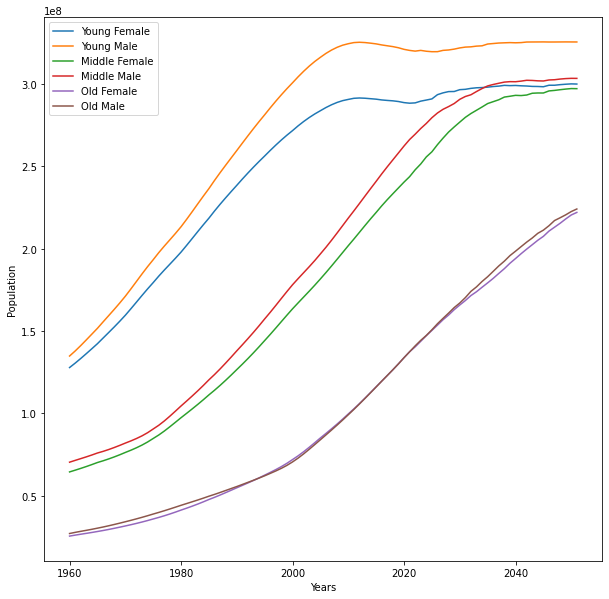

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlabel('Years')
plt.ylabel('Population')

ymy = []
yfy = []
for j in range(len(x)):
    yfy.append(sum(data_IND.iloc[[0,2,4,6,8], :][x[j]]))
    ymy.append(sum(data_IND.iloc[[1,3,5,7,9], :][x[j]]))
plt.plot(x, yfy, label = "Young Female")
plt.plot(x, ymy, label = "Young Male")

ymm = []
yfm = []
for j in range(len(x)):
    yfm.append(sum(data_IND.iloc[[10,12,14,16,18], :][x[j]]))
    ymm.append(sum(data_IND.iloc[[11,13,15,17,19], :][x[j]]))
plt.plot(x, yfm, label = "Middle Female")
plt.plot(x, ymm, label = "Middle Male")

ymo = []
yfo = []
for j in range(len(x)):
    yfo.append(sum(data_IND.iloc[[20,22,24,26], :][x[j]]))
    ymo.append(sum(data_IND.iloc[[21,23,25,27], :][x[j]]))
plt.plot(x, yfo, label = "Old Female")
plt.plot(x, ymo, label = "Old Male")

plt.legend()
plt.show()

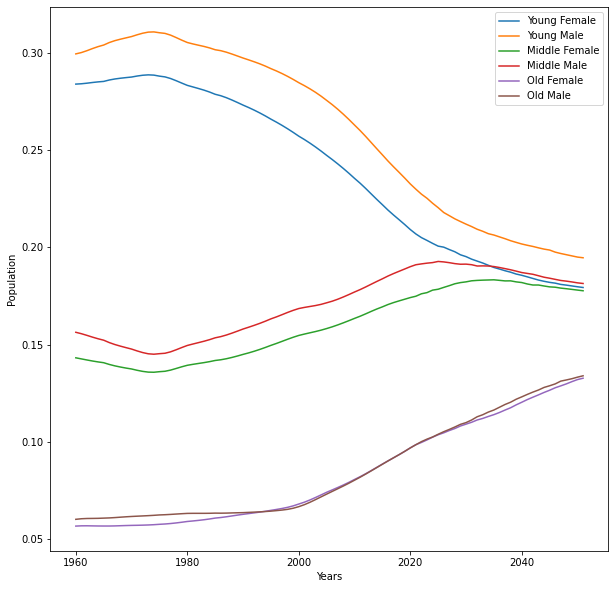

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlabel('Years')
plt.ylabel('Population')

yfyn = []
ymyn = []

for j in range(len(x)):
    yfyn.append((sum(data_IND.iloc[[0,2,4,6,8], :][x[j]])/(yfy[j] + ymy[j] + ymm[j] + yfm[j] + ymo[j] + yfo[j])))
    ymyn.append(sum(data_IND.iloc[[1,3,5,7,9], :][x[j]])/(yfy[j] + ymy[j] + ymm[j] + yfm[j] + ymo[j] + yfo[j]))
plt.plot(x, yfyn, label = "Young Female")
plt.plot(x, ymyn, label = "Young Male")

ymmn = []
yfmn = []
for j in range(len(x)):
    yfmn.append(sum(data_IND.iloc[[10,12,14,16,18], :][x[j]])/(yfy[j] + ymy[j] + ymm[j] + yfm[j] + ymo[j] + yfo[j]))
    ymmn.append(sum(data_IND.iloc[[11,13,15,17,19], :][x[j]])/(yfy[j] + ymy[j] + ymm[j] + yfm[j] + ymo[j] + yfo[j]))
plt.plot(x, yfmn, label = "Middle Female")
plt.plot(x, ymmn, label = "Middle Male")

ymon = []
yfon = []
for j in range(len(x)):
    yfon.append(sum(data_IND.iloc[[20,22,24,26], :][x[j]])/(yfy[j] + ymy[j] + ymm[j] + yfm[j] + ymo[j] + yfo[j]))
    ymon.append(sum(data_IND.iloc[[21,23,25,27], :][x[j]])/(yfy[j] + ymy[j] + ymm[j] + yfm[j] + ymo[j] + yfo[j]))
plt.plot(x, yfon, label = "Old Female")
plt.plot(x, ymon, label = "Old Male")

plt.legend()
plt.show()